In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form style="text-align:right;"action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')



#Monte-Carlo Integration#

So far, we have learned multiple ways to both approximate and evaluate definite integrals. The most ubiquitous of these methods, called the **Riemann Sum**, estimates the bounded area of a curve $f(x)$ by adding together a sequence of rectangles with width $\Delta x$ and height $f(x)$ 

###$$ \sum f(x)\, \Delta x$$###

By increasing the number of these rectangles while proportionally shrinking their width, 

Developed as a tool for particle simulation during the Manhattan Project, the Monte-Carlo method relies on (pseudo) random number generation to efficiently approximate numerical values of difficult integrals and other tricky mathematical problems. The name "Monte-Carlo", also the codename for the project, was inspired by the Polish mathemetician Stanislaw Ulam whose uncle would gamble away his relatives money at the casino in Monte-Carlo. Unlike Ulam's uncle, however, the Monte-Carlo method has a far greater success rate.

The theory behind the Monte-Carlo method, and more specifically Monte-Carlo integration, can be likened to a game of darts. Imagine a dartboard with an area $A'$ and a curve $C$ of area $A$ within our dartboard:

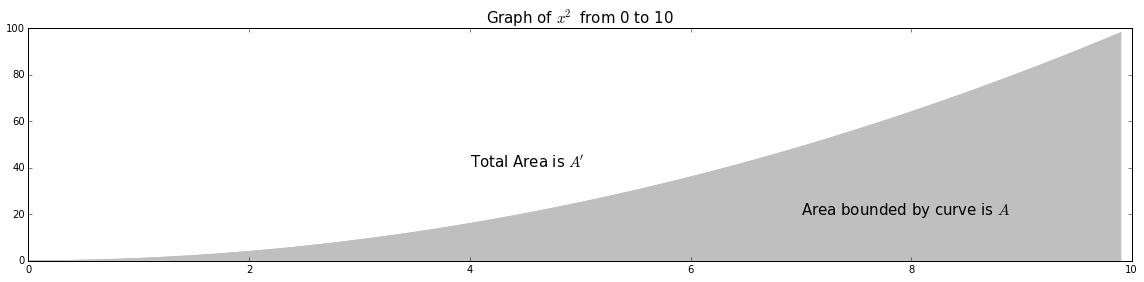

In [1]:
%matplotlib inline
from __future__ import division
import random as rand
import math
import numpy as np
import matplotlib.pyplot as plt
from decimal import *

title_font = 15

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(111)
x = np.arange(0, 10, 0.1);
y = np.power(x, 2)
ax1.set_title("Graph of $x^2$ from 0 to 10", fontsize=title_font)
plt.annotate('Area bounded by curve is $A$ ', xy=(7, 20), fontsize=title_font)
plt.annotate("Total Area is $A'$", xy=(4, 40), fontsize=title_font)
plt.fill_between(x, y, 0, color='0.75')
plt.plot(x, y, color='0.75')
fig.tight_layout()

Now let us take a handful of "darts" and throw them at this dartboard. If these darts land randomly on the board, the ratio of the number of darts that land within the bounds of the curve to the total number of darts should nearly be equivalent to the ratio of the area bounded by curve and the total area of the board. Where $N$ is number of darts bounded by the curve and $N'$ the total number of darts,

###$$ \frac{A}{A'} = \frac{N}{N'}$$###

So we can find the area bounded by the curve that intersects the dartboard by solving for $A$:

###$$ A = \frac{N}{N'}A'$$###

It is apparent here that the more "darts" are thrown at the board, the more accurate the measurement of the area bounded by the curve between an interval, also known as a definite integral, becomes. Let us now attempt to estimate the integral of $x^2$ in the interval 1 to 10 using the Monte-Carlo method of integration with 1000 'darts'. Note that the exact value of this definite integral is 333.33. 

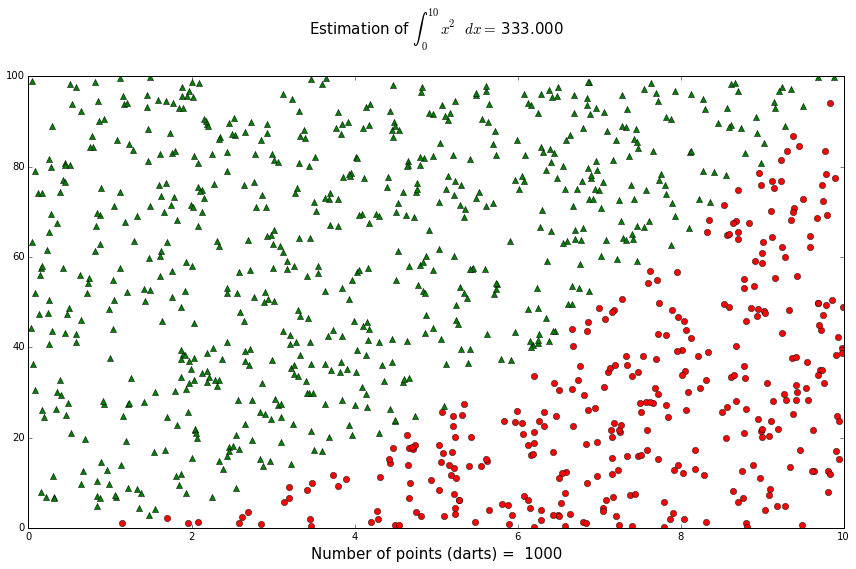

In [2]:
import monte
fig = plt.figure(figsize=(12,8))
squared = lambda x: x**2

ax1 = fig.add_subplot(111)
result = monte.monte_carlo(squared, 1000, 0, 10)
ax1.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax1.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax1.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax1.set_ylabel('', y=1.08)
ax1.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# adjust layout
fig.tight_layout()

In this graph, the red circles represent the "darts" (hereby referred to as points) that are bounded by the curve. In the algorithm, this condition is satisfied when $y < f(x)$ for a randomly generated point $(x,y)$. The green triangles represent those points unbounded by the curve. This condition is satisfied when $y > f(x)$ for a similar point $(x,y)$. With only 1,000 points used in this Monte-Carlo integration (hereby referred to as iterations), we can clearly see that the estimated value of this definite integral will not even come close to the exact value. And because of the random nature of Monte-Carlo integration, estimating the percent-error of a calculation is more difficult with fewer iterations. Thus the percent-error of a Monte-Carlo integration with only 1,000 iterations fluctuates greatly across calculations. Now let's up the ante and try estimating this same definite integral with 10,000 and 100,000 iterations a piece:

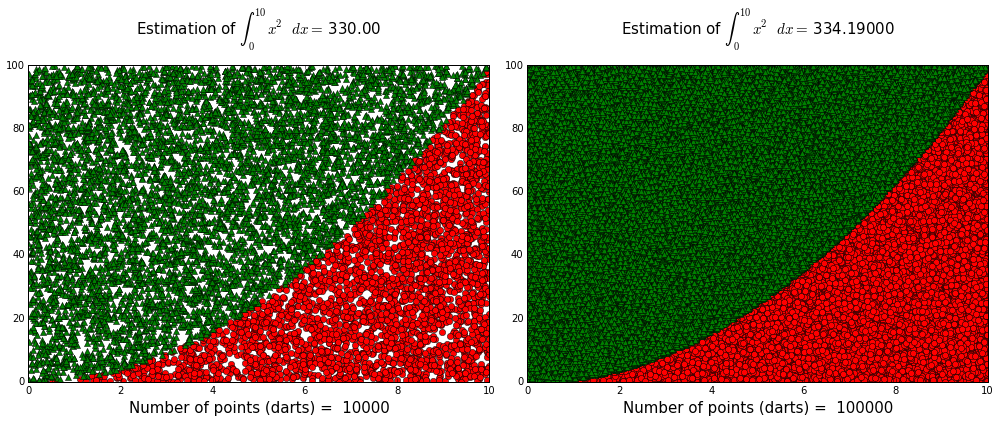

In [3]:
import monte
fig = plt.figure(figsize=(14,6))
squared = lambda x: x**2 # f(x)

# graph 1
ax1 = fig.add_subplot(121)
result = monte.monte_carlo(squared, 10000, 0, 10)
ax1.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax1.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax1.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax1.set_ylabel('', y=1.08)
ax1.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# graph 2
ax2 = fig.add_subplot(122)
result = monte.monte_carlo(squared, 100000, 0, 10)
ax2.plot(result['x_points_in'] , result['y_points_in'] , 'ro' )
ax2.plot(result['x_points_out'] , result['y_points_out'] , 'g^' )
ax2.set_title("Estimation of $\int_0^{10} x^2\, dx =$ " +  str(result['integration']),y=1.08, fontsize=15)
ax2.set_ylabel('', y=1.08)
ax2.set_xlabel("Number of points (darts) =  " + str(result['darts']), fontsize=15)

# adjust layout
fig.tight_layout()

With ten calculations using 100,000 iterations each, the percent error of the approximation hovers around 0.01%. That is commendable accuracy with a relatively lightweight computation. We can now grasp the ability of the Monte-Carlo method to effectively estimate the value of a definite integral, but how many iterations are necessary to maximize accuracy and efficiency? The graph below shows the average error of 250 separate Monte-Carlo integrations of this same definite integral based on the number of iterations in each calculation.

In [10]:
import monte
squared = lambda x: x**2

x_values = range(500,10000,250)
y_values = []

for x in x_values:
    y_values.append(monte.average_error(squared, x, 0, 10, 100, 333.33))

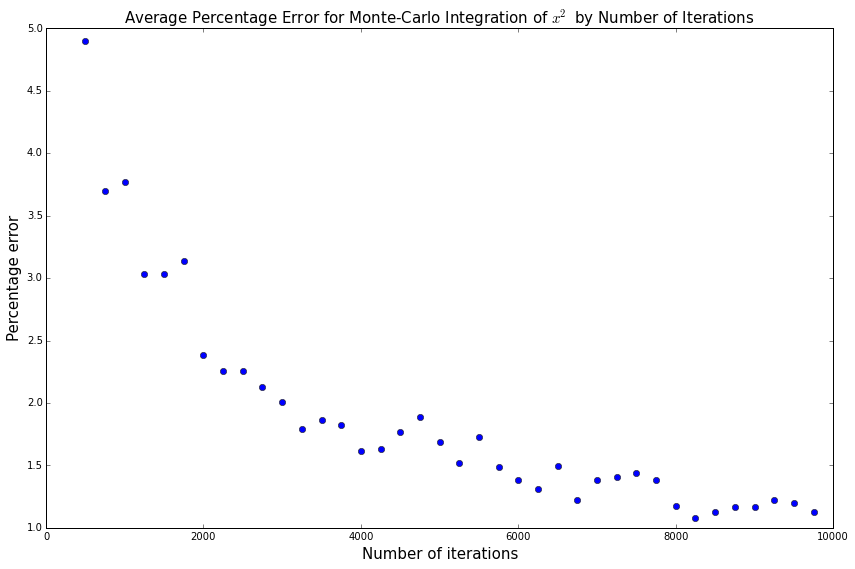

In [11]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(x_values , y_values , 'bo' )

ax1.set_title("Average Percentage Error for Monte-Carlo Integration of $x^2$ by Number of Iterations", fontsize=15)
ax1.set_ylabel('Percentage error', fontsize=15)
ax1.set_xlabel("Number of iterations", fontsize=15)

# adjust layout
fig.tight_layout()

As shown is this graph, the accuracy increases with a greater number of iterations as we expected. But with a greater number of calculations come a greater computational cost. The next graph compares the average 

In [12]:
import monte
squared = lambda x: x**2

x_values = range(500,10000,250)
y_values = []

for x in x_values:
    y_values.append(monte.average_time(squared, x, 0, 10, 100))

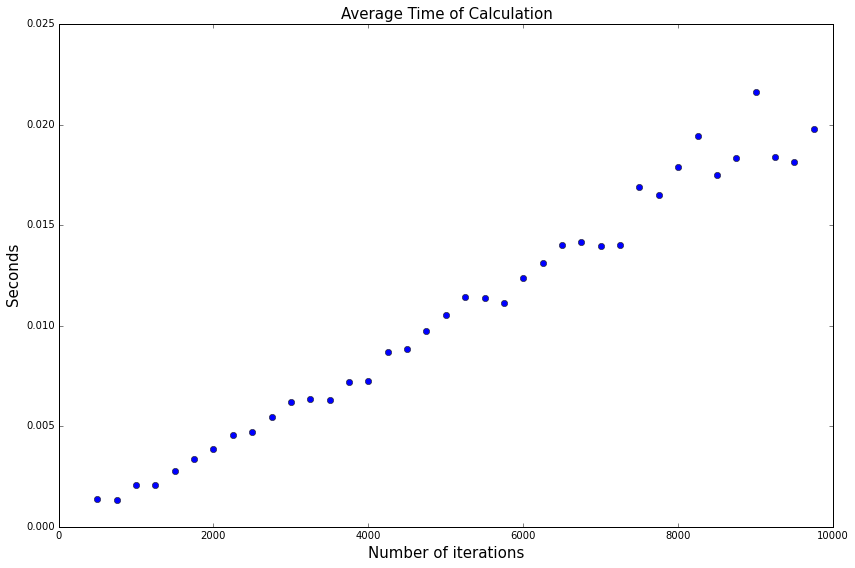

In [14]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)
ax1.plot(x_values , y_values , 'bo' )

ax1.set_title("Average Time of Calculation", fontsize=15)
ax1.set_ylabel('Seconds', fontsize=15)
ax1.set_xlabel("Number of iterations", fontsize=15)

# adjust layout
fig.tight_layout()